**Task: Day 2 - NYC School directory**

**🎯 Objective**

Explore a real-world dataset using Python and Jupyter Notebook. You'll clean the data, perform basic analysis, create visualizations, and share your insights.

**✅ Instructions**

1. Download the dataset from the day_2_datasets folder.

2. Open a new Jupyter Notebook and:

    - a) Load the dataset using pandas
    - b) Clean the column names (make lowercase, replace spaces with _, remove special characters)

3. Filter the dataset to include only schools located in Brooklyn

4. Answer the following:

   - a) How many total schools are in Brooklyn? (use the method that counts only unique values. Also there is a column that has a unique identifier for schools.)
   - b) How many schools in Brooklyn offer Grade 9 entry? (here you need to use range to get the correct answer for example just stating min_grade entry >=9 will miss the schools that offer earlier entry))

5. Group and summarize:

    - a) Count of schools per borough (again unique schools)
    - b) Average number of students per borough
    - c) Summary of grade_span_max grouped by borough (use the method that provides you with basic statistics about that column)

6. Create visualizations:

    - Bar chart: Number of schools per borough

7. Write 2–3 key insights based on your findings at the end of the notebook


**Loading Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the Dataset**

In [2]:
# Load the dataset
df=pd.read_csv('./day_2_datasets/high-school-directory.csv')


In [4]:
pd.set_option('display.max_columns', None)  # Show all columns
df.head(5)

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,postcode,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,"Q113, Q22",A to Beach 25th St-Wavecrest,8-21 Bay 25 Street,Far Rockaway,NY,11691,http://schools.nyc.gov/schoolportals/27/Q260,412.0,Far Rockaway Educational Campus,NaN,Frederick Douglass Academy (FDA) VI High Schoo...,"Advisory, Graphic Arts Design, Teaching Intern...",Spanish,"Calculus AB, English Language and Composition,...","Biology, Physics B","French, Spanish","After-school Program, Book, Writing, Homework ...","Basketball, Cross Country, Indoor Track, Outdo...","Basketball, Cross Country, Indoor Track, Outdo...",NaN,"Step Team, Modern Dance, Hip Hop Dance",NaN,"Jamaica Hospital Medical Center, Peninsula Hos...","York College, Brooklyn College, St. John's Col...",NaN,"Queens District Attorney, Sports and Arts Foun...","Replications, Inc.",Citibank,New York Road Runners Foundation (NYRRF),"Uniform Required: plain white collared shirt, ...","Extended Day Program, Student Summer Orientati...",7:45 AM,2:05 PM,This school will provide students with disabil...,ESL,Not Functionally Accessible,1,Priority to Queens students or residents who a...,Then to New York City residents who attend an ...,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"{'latitude': '40.601989336', 'longitude': '-73...",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,"B1, B3, B4, B6, B64, B82",D to 25th Ave ; N to Ave U ; N to Gravesend - ...,2630 Benson Avenue,Brooklyn,NY,11214,http://schools.nyc.gov/schoolportals/21/K559,260.0,Lafayette Educational Campus,NaN,At Life Academy High School for Film and Music...,"College Now, iLEARN courses, Art and Film Prod...",Spanish,NaN,"Biology, English Literature and Composition, E...",NaN,"Film, Music, Talent Show, Holiday Concert, Stu...","Basketball, Bowling, Indoor Track, Soccer, Sof...","Basketball, Bowling, Indoor Track, Soccer, Sof...",Cricket,NaN,Coney Island Generation Gap,NaN,"City Tech, Kingsborough Early College Secondar...","Museum of the Moving Image, New York Public Li...",Institute for Student Achievement,"Film Life, Inc., SONY Wonder Tech",NaN,NaN,Our school requires completion of a Common Cor...,NaN,8:15 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to New York City residents who attend...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'latitude': '40.593593811', 'longitude': '-73...",13.0,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,"B15, B38, B46, B47, B52, B54, Q24","J to Kosciusko St ; M, Z to Myrtle Ave",1014 Lafayette Avenue,Brooklyn,NY,11221,http://schools.nyc.gov/schoolportals/16/K393,155.0,NaN,NaN,The Frederick Douglass Academy IV (FDA IV) Sec...,"C

**Cleaning the columns names**

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace(r'[^\w_]', '', regex=True)
df.columns

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

**🧼 What it does step by step:**

1.	df.columns

Accesses the column names of the DataFrame df.

2.	.str.lower()

Converts all column names to lowercase

→ "School Name" → "school name"

3.	.str.replace(' ', '_')

Replaces spaces with underscores

→ "school name" → "school_name"

4.	.str.replace(r'[^\w_]', '', regex=True)

Removes special characters except underscores.

- \w means: any alphanumeric character (A–Z, a–z, 0–9, and underscore)
- ^\w_ means: anything except those
	
→ "avg% score!" → "avg_score"

**Filtering the dataset schools in Brooklny**

In [9]:
brooklyn_schools = df[df['borough'] == 'Brooklyn']

In [10]:
print('The shape of brooklyn school dataset\n',brooklyn_schools.shape)
brooklyn_schools.head(5)

The shape of brooklyn school dataset
 (121, 69)


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,postcode,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,location_1,community_board,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,"B1, B3, B4, B6, B64, B82",D to 25th Ave ; N to Ave U ; N to Gravesend - ...,2630 Benson Avenue,Brooklyn,NY,11214,http://schools.nyc.gov/schoolportals/21/K559,260.0,Lafayette Educational Campus,NaN,At Life Academy High School for Film and Music...,"College Now, iLEARN courses, Art and Film Prod...",Spanish,NaN,"Biology, English Literature and Composition, E...",NaN,"Film, Music, Talent Show, Holiday Concert, Stu...","Basketball, Bowling, Indoor Track, Soccer, Sof...","Basketball, Bowling, Indoor Track, Soccer, Sof...",Cricket,NaN,Coney Island Generation Gap,NaN,"City Tech, Kingsborough Early College Secondar...","Museum of the Moving Image, New York Public Li...",Institute for Student Achievement,"Film Life, Inc., SONY Wonder Tech",NaN,NaN,Our school requires completion of a Common Cor...,NaN,8:15 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to New York City residents who attend...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'latitude': '40.593593811', 'longitude': '-73...",13.0,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,"B15, B38, B46, B47, B52, B54, Q24","J to Kosciusko St ; M, Z to Myrtle Ave",1014 Lafayette Avenue,Brooklyn,NY,11221,http://schools.nyc.gov/schoolportals/16/K393,155.0,NaN,NaN,The Frederick Douglass Academy IV (FDA IV) Sec...,"College Now with Medgar Evers College, Fresh P...","French, Spanish","English Language and Composition, United State...",French Language and Culture,NaN,"After-school and Saturday Programs, Art Studio...",NaN,NaN,NaN,Basketball Team,Achieving Change in our Neighborhood (Teen ACT...,NaN,Medgar Evers College,Noel Pointer School of Music,"Hip-Hop 4 Life, Urban Arts, and St. Nicks Alli...",NaN,NaN,NaN,"Dress Code Required: solid white shirt/blouse,...","Student Summer Orientation, Weekend Program of...",8:00 AM,2:20 PM,This school will provide students with disabil...,ESL,Not Functionally Accessible,1,Priority to continuing 8th graders,Then to Brooklyn students or residents who att...,Then to New York City residents who attend an ...,Then to Brooklyn students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"{'latitude': '40.692133704', 'longitude': '-73...",3.0,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
7,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,"B15, B25, B26, B43, B44, B45, B46, B65",3 to Kingston Ave ; A to Utica Ave ; C to King...,150 Albany Avenue,Brooklyn,NY,11213,www.ptechnyc.org,330.0,Paul Robeson Educational Campus,NYC P-Tech 9-14 School,At Pathways in Technology Early College High S...,"Internships, Mentorship Program, Early College...",NaN,NaN,NaN,NaN,"National Honor Society, National Society of Bl

In [12]:
brooklyn_schools['school_name'].nunique()

121

In [18]:
brooklyn_schools['dbn'].nunique()

121

In [13]:
print("Value counts for 'grade_span_min':")
print(brooklyn_schools['grade_span_min'].value_counts())

print("\nValue counts for 'grade_span_max':")
print(brooklyn_schools['grade_span_max'].value_counts())

Value counts for 'grade_span_min':
grade_span_min
9.0    98
6.0    23
Name: count, dtype: int64

Value counts for 'grade_span_max':
grade_span_max
12    117
10      2
9       1
11      1
Name: count, dtype: int64


In [14]:
brooklyn_grade_9_schools = brooklyn_schools[(brooklyn_schools['grade_span_min'] <= 9) & (brooklyn_schools['grade_span_max'] >= 9)]

In [15]:
len(brooklyn_grade_9_schools)

121

In [16]:
brooklyn_grade_9_schools['school_name'].nunique()

121

**There are 121 unique numbers of schools in Brooklyn. All of them offer Grade 9 entry.**



**Grouping & Summarize**

In [20]:
df.groupby('borough')['dbn'].nunique()

borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64

**📊 Number of Unique Schools by Borough (df['dbn'].nunique())**

This tells us how many unique schools are listed in each borough:

- Brooklyn has the most schools: 121
- Followed by Bronx (118), Manhattan (106), Queens (80)
- Staten Island has the fewest: 10

In [21]:
df.groupby('borough')['total_students'].mean()

borough
Bronx             490.406780
Brooklyn          699.134454
Manhattan         589.825243
Queens           1046.644737
Staten Island    1847.500000
Name: total_students, dtype: float64

**👥 Average Number of Students per School (df['total_students'].mean())**

This shows the average number of students enrolled per school in each borough:

- Staten Island has the highest average enrollment: ~1847 students per school
- Queens follows with ~1047
- Bronx has the lowest average: ~490 students per school

In [22]:
df.groupby('borough')['grade_span_max'].describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,118.0,11.906780,0.369506,9.0,12.0,12.0,12.0,12.0
Brooklyn,121.0,11.933884,0.381566,9.0,12.0,12.0,12.0,12.0
Manhattan,106.0,11.877358,0.472135,9.0,12.0,12.0,12.0,12.0
Queens,80.0,11.825000,0.497462,10.0,12.0,12.0,12.0,12.0
Staten Island,10.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0


**🔍 Insights:**

-	🟢 Staten Island has full 12th grade coverage across all schools.
-	🟡 Other boroughs (Bronx, Brooklyn, Manhattan, Queens) have a few schools ending earlier (e.g., grade 9 or 10), as seen from the min values.
-	🔢 Standard deviation (std) shows variation: Queens has the most variation in grade span max (std ≈ 0.5).

**Visualizations**

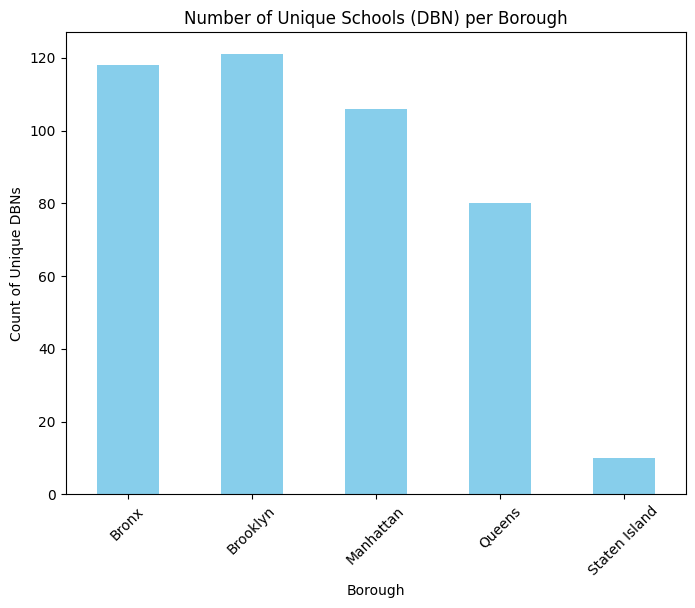

In [23]:
# Count of unique 'dbn' per 'borough'
dbn_count_per_borough = df.groupby('borough')['dbn'].nunique()

# Plotting the bar chart
dbn_count_per_borough.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Number of Unique Schools (DBN) per Borough')
plt.xlabel('Borough')
plt.ylabel('Count of Unique DBNs')
plt.xticks(rotation=45)
plt.show()

- Brooklyn has the highest number of unique schools (DBNs), followed closely by the Bronx and Manhattan.
- Staten Island has significantly fewer schools compared to the other boroughs.

**Some key insights**

1.	Brooklyn leads in number of schools
With 121 unique schools (DBNs), Brooklyn has the highest number of schools among all NYC boroughs, followed by the Bronx (118) and Manhattan (106).

2.	Grade coverage is consistent across boroughs
Most schools across all boroughs offer education up to Grade 12, with average grade_span_max values close to 12. However, Queens and Manhattan show slightly lower means, suggesting a few schools ending at lower grades.

3.	Staten Island stands out in student population
Despite having the fewest schools (10), Staten Island shows a significantly higher average number of students per school (~1847), indicating larger schools compared to other boroughs.